<a href="https://colab.research.google.com/github/uorocketry/beamforming-ipynb/blob/main/LMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

n iters 967


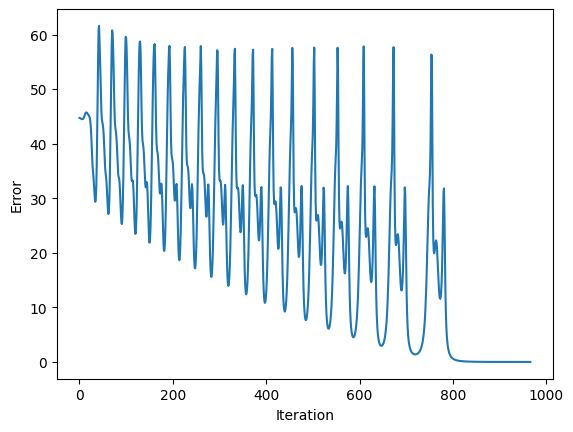


Weights:  [-4.004788547976509, 29.088612978084107]



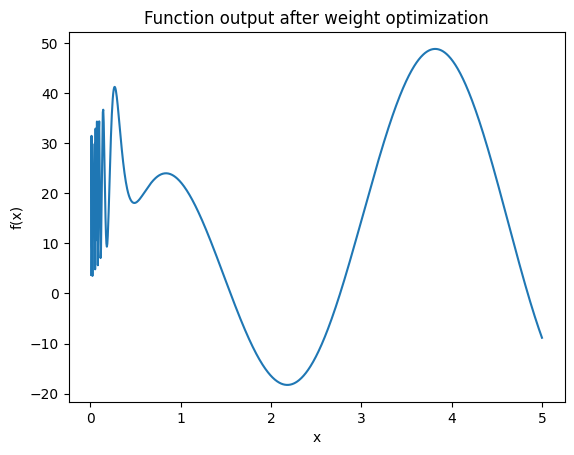

Expected: f(23) = 45
f(23) = 44.999903828074224


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = 23
desired = 45

# Define the LMS algorithm parameters
learning_rate = 0.001
num_iterations = 1000

weights = [np.random.rand(), np.random.rand()]

def c3(x):
    global weights
    return  np.sin(x*2 + weights[1]* 4) * 5

def c2(x):
    global weights
    return np.cos(weights[0]+x+1/x )**2

def f(x):
    global weights
    return weights[0] * c3(x) + weights[1] * c2(x)

# Find weights such that the function f(3) is 0.5
# Given f(X) = w_0 * sin(2x + w_1 * 4) + w_1 * cos(w_0 + x + 1/x)^2

errors = []
# Iterate over the input signal and update the filter coefficients
while True:
    output = f(x)

    # if output is nan raise
    if np.isnan(output):
        raise ValueError("Output is nan")

    error = desired - output
    errors.append(error)
    if abs(error) < 0.0001:
    # if abs(f(x) - desired) < 0.000001:
      break

    c3v = c3(x)
    c2v = c2(x)

    weights[0] += 2 * learning_rate * error * c3v
    weights[1] += 2 * learning_rate * error * c2v
    # weights[2] += 2 * learning_rate * error * c1

# Plot the error
print("n iters", len(errors))
xs = np.arange(len(errors))
plt.plot(xs, errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

print()
print("Weights: ", weights)
print()
# Plot the function
x_values = np.linspace(0.01, 5, 1000)  # Generate 100 x values between 0 and 10
output_values = []

for x_val in x_values:
    output = f(x_val)
    output_values.append(output)

plt.plot(x_values, output_values)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function output after weight optimization')
plt.show()
print(f"Expected: f({x}) = {desired}")
print(f"f({x}) = {f(x)}")

x_k: [[0.23213664+0.88302389j 0.39600647+0.06124706j 0.55978894+0.96729197j]
 [0.2287858 +0.65260227j 0.12485339+0.01907041j 0.51373859+0.64034738j]
 [0.70476962+0.15548653j 0.25406946+0.34475659j 0.5421567 +0.25474373j]]
w: [[0.72275762+0.18187346j 0.58281879+0.8336801j  0.32113417+0.17483123j]
 [0.73140334+0.39369036j 0.92468822+0.42857491j 0.06275936+0.87878808j]
 [0.95064834+0.22119261j 0.11126483+0.38778857j 0.31999966+0.20345645j]]
d_k: (3+2j)
y(k): (3.000049414598583+1.9994927284952444j)
w(k): [[-0.11075092+0.31635503j  0.49094602+1.19265604j -0.61930643+0.60331464j]
 [ 0.11026518+0.54574624j  0.89594302+0.54177476j -0.57264714+1.29420073j]
 [ 0.74435977+0.85589167j -0.22881243+0.59071409j  0.03693805+0.67959487j]]
d(k): (3+2j)
0.0007564113541777669
solved in 22 iterations took 0.01 seconds


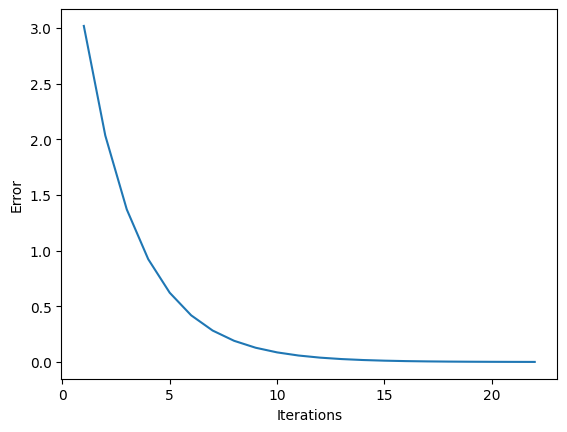

In [ ]:
from os import times
import numpy as np
import random
import time
import matplotlib.pyplot as plt

# Desired dot value
d_k = random.randrange(1,10)+1.j*random.randrange(1,10)

# Current xs
x_k = np.array(np.random.rand(3,3)+1.j*np.random.rand(3,3))

# Applied weights
w = np.array(np.random.rand(3,3)+1.j*np.random.rand(3,3))
# w = np.array([[0+0j,0+0j,0+0j]]*3)
# cov_matrix = np.cov(x_k)
# lambda_max = 1/max(np.linalg.eigvals(cov_matrix))
# lr = np.linalg.norm(lambda_max)
# print(lr)
step_size = 0.1
iterations = 0
e_vals = []
start_t = time.time()
print("x_k: "+ str(x_k))
print("w: "+ str(w))
print("d_k: "+ str(d_k))
error = 9999
while np.linalg.norm(error) > 0.001:
    error = d_k - np.vdot(x_k.T, w)
    w += step_size * x_k * error
    e_vals.append(np.linalg.norm(error))
    iterations += 1
if np.isnan(error):
    print("Error is nan")
print("y(k): " + str(np.vdot(x_k.T,w)))
print("w(k): " + str(w))
print("d(k): " + str(d_k))
print(e_vals[-1])
print(f"solved in {iterations} iterations took {round(time.time() - start_t,2)} seconds")

iterations_xs = np.linspace(1,iterations,iterations)
plt.plot(iterations_xs,e_vals)
plt.ylabel("Error")
plt.xlabel("Iterations")
plt.show()




In [ ]:
import numpy as np
import random
import time


# Parameters
num_elements = 8          # Number of antenna elements
element_spacing = 0.5     # Spacing between elements (in wavelengths)
step_size = 0.001          # Learning rate for LMS
error_threshold = 0.01    # Convergence criteria
max_iterations = 10000    # Prevent infinite loops
theta_target_deg = 45   # Target angle in degrees

# Steering angle
theta_target = np.deg2rad(theta_target_deg)  # Convert to radians

# See https://pysdr.org/content/doa.html#conventional-beamforming-doa
steering_vector = np.exp(-2j  * np.pi * element_spacing * np.arange(num_elements) * np.sin(theta_target))


# Desired signal
# d_k = random.uniform(1, 10) + 1j * random.uniform(1, 10)
d_k = 1 + 0j


noise_power = 0.3
x_k = steering_vector + (np.random.randn(num_elements) + 1j * np.random.randn(num_elements)) * noise_power


# Input signal (complex vector for all elements)
# x_k = np.random.rand(num_elements) + 1j * np.random.rand(num_elements)

# Initialize weights (complex vector)
w = np.zeros(num_elements, dtype=complex)

# LMS Algorithm
iterations = 0
max_iterations = 10000
e_vals = []
w_vals = []
start_t = time.time()
print("Initial x_k:", x_k)
print("Initial w:", w)
print("Desired d_k:", d_k)
error = 9999
y_k = None

while np.linalg.norm(error) > error_threshold and iterations < max_iterations:
    y_k = np.vdot(x_k.T, w)
    error = d_k - y_k
    w += step_size * x_k * error
    # w_vals.append(w.copy())
    e_vals.append(np.linalg.norm(error))
    iterations += 1

if np.isnan(error):
    print("Error is nan!!!!!!!!!!!!!!!!!!!")
else:
    print("Converged in {} iterations".format(iterations))
print("Final y(k):", y_k)
print("Final w(k):", w)
print("Final error magnitude:", e_vals[-1])
print(f"Time taken: {round(time.time() - start_t, 4)} seconds")


Initial x_k: [ 1.32420378-0.6743487j  -0.70340354-0.92444497j -0.60250553+0.90467522j
  0.94918447-0.3441856j  -0.90321666-0.66140391j  0.45485566+1.22766549j
  0.89184288-0.53647924j -0.93150782+0.03890028j]
Initial w: [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Desired d_k: (1+0j)
Converged in 430 iterations
Final y(k): (0.9900042304394933+4.163336342344337e-17j)
Final w(k): [ 0.12278336-0.06252724j -0.06522127-0.08571677j -0.05586576+0.08388367j
  0.08801067-0.03191372j -0.08374842-0.06132696j  0.04217531+0.1138321j
  0.08269382-0.04974365j -0.08637165+0.00360693j]
Final error magnitude: 0.00999576956050674
Time taken: 0.0169 seconds


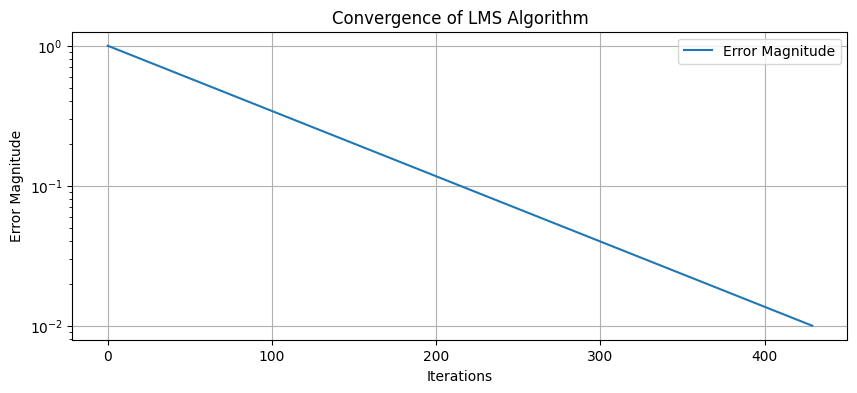

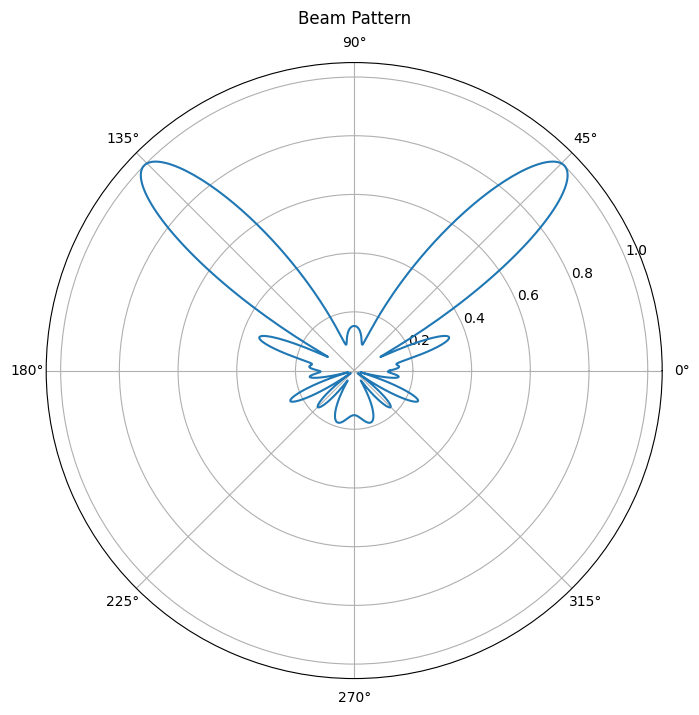

In [ ]:

# Plotting the Error Convergence
plt.figure(figsize=(10, 4))
plt.plot(range(iterations), e_vals, label='Error Magnitude')
plt.yscale('log')
plt.ylabel("Error Magnitude")
plt.xlabel("Iterations")
plt.title("Convergence of LMS Algorithm")
plt.grid(True)
plt.legend()
plt.show()

# Beam Pattern Visualization
angles = np.linspace(0, 2 * np.pi, 1000)
array_response = np.zeros_like(angles, dtype=float)

# uncommenting this line should mess up with the beamshape
# since the weights would be pretty much wrong
# w = np.random.rand(num_elements) + 1j * np.random.rand(num_elements)

for idx, theta in enumerate(angles):
    steering_vector = np.exp(-2j * np.pi * element_spacing * np.arange(num_elements) * np.sin(theta) )
    response = np.vdot(w, steering_vector)
    array_response[idx] = np.abs(response)

# Normalize the response
array_response /= np.max(array_response)

# Polar Plot of Beam Pattern
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.plot(angles, array_response)
ax.set_title("Beam Pattern", va='bottom')
ax.grid(True)
plt.show()

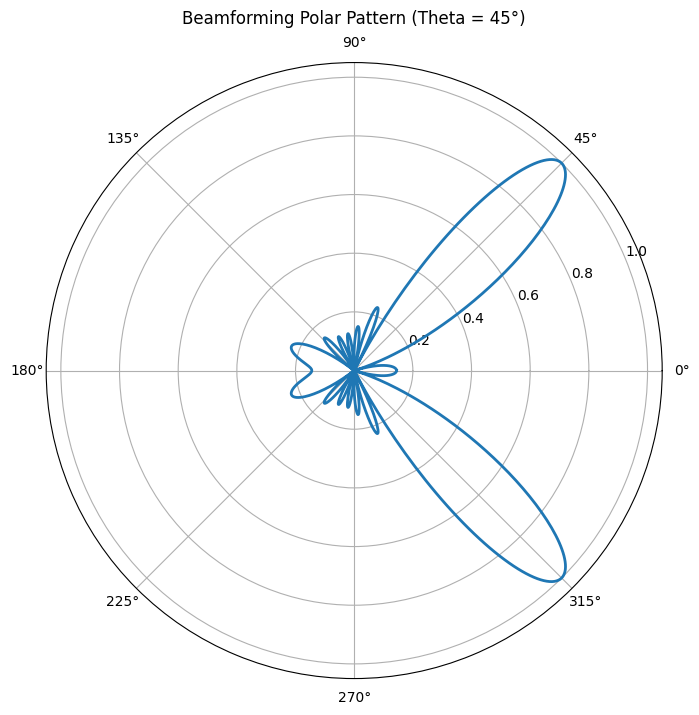

In [ ]:
# Optimal Beamforming plot
import numpy as np
import matplotlib.pyplot as plt

# Parameters
theta = 45
N = 8  # Number of antenna elements
d = 0.5  # Spacing between elements (in wavelengths)
theta_rad = np.deg2rad(theta)  # Convert theta to radians

# Steering vector
s = np.exp(-2j * np.pi * d * np.arange(N) * np.sin(theta_rad))

# Plotting angles
phi = np.linspace(0, 2 * np.pi, 1000)

# Array factor calculation
k = 2 * np.pi  # Wavenumber (normalized by wavelength)
psi = k * d * (np.cos(phi) - np.cos(theta_rad))
array_factor = np.abs(np.dot(s, np.exp(1j * k * d * np.outer(np.arange(N), np.cos(phi)))))
array_factor = np.nan_to_num(array_factor)  # Handle NaN values
array_factor = array_factor / np.max(array_factor)  # Normalize

# Plotting the polar pattern
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.plot(phi, array_factor, linewidth=2)
ax.set_title(f'Beamforming Polar Pattern (Theta = {theta}°)', va='bottom')
plt.show()


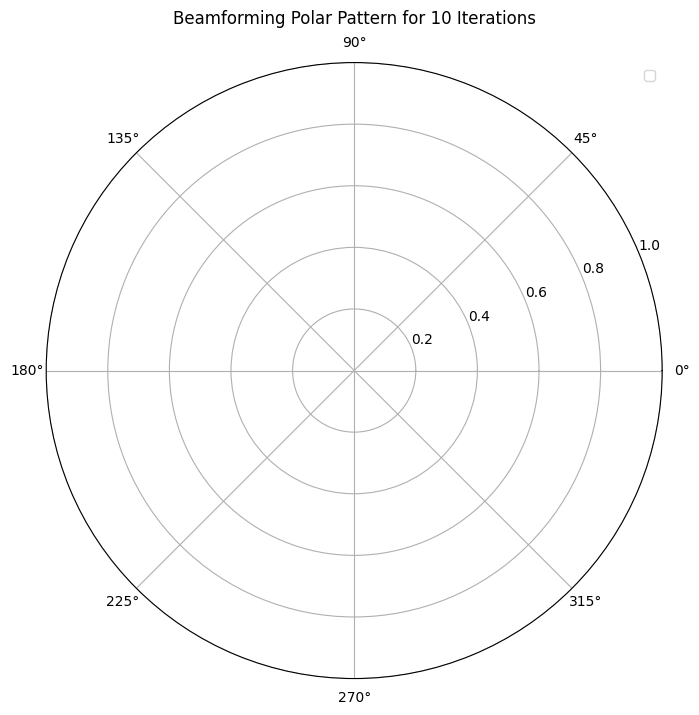

In [ ]:
# Plotting the polar pattern using 10 weights from w_vals
phi = np.linspace(0, 2 * np.pi, 1000)
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
for i in range(10):
    if i < len(w_vals):
        w_current = w_vals[i]
        array_factor = np.abs(np.dot(w_current, np.exp(1j * 2 * np.pi * element_spacing * np.outer(np.arange(num_elements), np.cos(phi)))))
        array_factor = array_factor / np.max(array_factor)  # Normalize
        ax.plot(phi, array_factor, linewidth=1, label=f'Iteration {i + 1}')

ax.set_title('Beamforming Polar Pattern for 10 Iterations', va='bottom')
plt.legend()
plt.show()